# Draw Gas & Electric Station on US Map

In [290]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import plotly.express as px

import geopandas as gpd
from geopandas import GeoDataFrame

%matplotlib inline

## Parameters 

In [291]:
#EV_STATION_DATASET   = '../Processed_Data/charging_station.csv'
GAS_STATION_DATASET   = '../Processed_Data/gas_station.csv'
OVERLAP_POSITION_DATA = '../Processed_Data/df_overlap_pos.csv'
NEV_STATION_DATASET   = '../Processed_Data/station.csv'
STATE_INFO_DATA       = '../Processed_Data/States_Info.csv'
USA_SHAPEFILE         = '../Raw_Data/US_Map_5m.json'

In [292]:
old_position = {'Vermont':[-72.7721723206516, 43.871287499999994],\
                'New Hampshire':[-71.55153363075382, 44.001686],\
                'Massachusetts':[-72.0906137083712, 42.148081000000005],\
                'Rhode Island':[-71.59827076340775, 41.662519],\
                'Connecticut':[-72.66284659760579, 41.5034435],\
                'New Jersey':[-74.37884099984127, 40.1403525],\
                'Delaware':[-75.5789503410023, 39.149795499999996],\
                'Maryland':[-76.75274030690827, 38.817387],\
                'West Virginia':[-80.29656250731031, 38.918831499999996],\
                'District of Columbia':[-76.98977922083728, 38.8960115],\
                'Alabama':[-86.73307855039542, 32.613208]
               }

new_position = {'Vermont':[-72.7721723206516, 46.871287499999994],\
                'New Hampshire':[-62.55153363075382, 44.001686],\
                'Massachusetts':[-62.590613708371194, 42.648081000000005],\
                'Rhode Island':[-63.098270763407754, 41.162519],\
                'Connecticut':[-64.16284659760579, 40.103443500000004],\
                'New Jersey':[-63.98977922083728, 38.8960115],\
                'Delaware':[-66.12884099984127, 37.6903525],\
                'Maryland':[-67.3289503410023, 36.4997955],\
                'West Virginia':[-79.79656250731031, 44.068831499999995],\
                'District of Columbia':[-68.75274030690827, 35.317387],\
                'Alabama':[-86.73307855039542, 26.613208]
               }

arrow_position = {'Vermont':[-72.7721723206516, 46.871287499999994],\
                'New Hampshire':[-66.15153363075382, 44.401686],\
                'Massachusetts':[-65.880613708371194, 42.898081000000005],\
                'Rhode Island':[-65.998270763407754, 41.562519],\
                'Connecticut':[-66.96284659760579, 40.403443500000004],\
                'New Jersey':[-66.70977922083728, 39.2060115],\
                'Delaware':[-68.12884099984127, 38.0203525],\
                'Maryland':[-69.3289503410023, 36.9597955],\
                'West Virginia':[-79.79656250731031, 44.068831499999995],\
                'District of Columbia':[-69.75274030690827, 35.917387],\
                'Alabama':[-86.73307855039542, 27.013208]
               }

## Load Datasets

### Load the Charging Station dataset

In [293]:
df_Elec = pd.read_csv(EV_STATION_DATASET,index_col=[0])
#df_Elec = df_Elec.set_index("State")
print(df_Elec.shape)
df_Elec.head()

(53, 42)


,1974,1976,1978,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Minnesota,0,0,0,0,0,0,0,0,0,0,...,287,340,414,478,563,675,778,1011,1225,1252
Florida,0,0,0,0,0,0,0,0,0,0,...,334,379,552,687,864,1062,1380,1829,2813,2962
Arizona,0,0,0,1,1,1,1,1,1,1,...,210,231,313,350,383,434,532,642,1033,1123
Texas,0,0,0,0,0,0,0,0,0,0,...,551,634,840,955,1075,1282,1564,2038,2938,3097
Illinois,0,0,0,0,0,0,0,0,0,0,...,363,418,510,590,671,785,901,1079,1454,1623


### Load the Gas Station dataset

In [294]:
df_Gas = pd.read_csv(GAS_STATION_DATASET,index_col=[0])
df_Gas = df_Gas.set_index("State")
print(df_Gas.shape)
df_Gas.head()

(51, 17)


,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
State,,,,,,,,,,,,,,,,,
Alabama,6000,5500,5390,5000,4500,4500,5000,5468,5360,5450,5500,6200,6150,6300,6300,6300,6300
Alaska,263,257,267,262,377,350,390,400,319,322,460,566,442,440,372,365,361
Arizona,4804,1907,1923,1950,2114,2110,2339,2400,2018,2277,2190,2000,2051,2037,2081,2063,2027
Arkansas,3280,3220,3313,2984,2831,2652,2652,2925,3185,3300,3300,2754,2540,2495,2350,2125,2107
California,14194,14200,11258,11258,11258,9520,9730,9750,9630,9822,9857,9970,10200,10400,10104,10100,10100


### Load the US shapefile

In [295]:
US_gpd = gpd.read_file(USA_SHAPEFILE)[['NAME', 'geometry']]\
    .rename(columns={'NAME':'States'})\
    .set_index('States')

def get_Coords(df_Main):
    df_Main['coords'] = df_Main['geometry'].apply(lambda x: x.representative_point().coords[:])
    df_Main['coords'] = [coords[0] for coords in df_Main['coords']]
    return df_Main

US_gpd = get_Coords(US_gpd)
US_gpd.head()

,geometry,coords
States,,
Alabama,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...","(-86.73307855039542, 32.613208)"
Alaska,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...","(-152.91343141521298, 62.878043500000004)"
Arizona,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...","(-111.66851071789918, 34.1684675)"
Arkansas,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...","(-92.49853688179809, 34.7509515)"
California,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...","(-119.9915015382688, 37.27239)"


### Load the overlap position data

In [296]:
df_overlap_pos = pd.read_csv(OVERLAP_POSITION_DATA,index_col=[0])
print(df_overlap_pos.shape)
df_overlap_pos.head()

(11, 3)


,new,old,arrow
Vermont,"(-72.7721723206516, 46.871287499999994)","(-72.7721723206516, 43.871287499999994)","(-72.7721723206516, 46.871287499999994)"
New Hampshire,"(-62.55153363075382, 44.001686)","(-71.55153363075382, 44.001686)","(-66.15153363075382, 44.401686)"
Massachusetts,"(-62.590613708371194, 42.648081000000005)","(-72.0906137083712, 42.148081000000005)","(-65.8806137083712, 42.898081000000005)"
Rhode Island,"(-63.098270763407754, 41.162519)","(-71.59827076340775, 41.662519)","(-65.99827076340776, 41.562519)"
Connecticut,"(-64.16284659760579, 40.103443500000004)","(-72.66284659760579, 41.5034435)","(-66.96284659760579, 40.4034435)"


### Load new energy station dataset

In [297]:
df_NEV = pd.read_csv(NEV_STATION_DATASET,index_col=[0])
print(df_NEV.shape)
df_NEV.head()

(765, 9)


,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total,Year
State,,,,,,,,,
Alabama,11,3,6,0,0,0,40,60,2008
Alaska,0,1,0,0,0,0,10,11,2008
Arizona,10,40,23,5,1,5,51,135,2008
Arkansas,2,3,7,0,0,0,37,49,2008
California,36,184,13,376,26,28,199,862,2008


### Load State Info

In [298]:
df_State_Info = pd.read_csv(STATE_INFO_DATA,index_col=[0])
print(df_State_Info.shape)
df_State_Info.head()

(52, 3)


,Region,Geo Region,Party
States,,,
Alabama,Region_4,South,Republican
Alaska,Region_10,West,Republican
Arizona,Region_9,West,Democratic
Arkansas,Region_6,South,Republican
California,Region_9,West,Democratic


# Visualising Station Info

## Draw New Energy Station Map
Add the new energy station data into the map dataframe as follows:

In [311]:
# Change location by position dict
df_new_pos = pd.DataFrame.from_dict(new_position,orient='index')
df_old_pos = pd.DataFrame.from_dict(old_position,orient='index')
df_arrow_pos = pd.DataFrame.from_dict(arrow_position,orient='index')

# Construct tuple for coords with x and y axis position
df_new_pos['coords']=df_new_pos[[0,1]].apply(tuple,axis=1)
df_old_pos['old_coords']=df_old_pos[[0,1]].apply(tuple,axis=1)
df_arrow_pos['arrow_coords']=df_arrow_pos[[0,1]].apply(tuple,axis=1)

# Drop the useless columns
df_new_pos = df_new_pos.drop(columns=[0,1])
df_old_pos = df_old_pos.drop(columns=[0,1])
df_arrow_pos = df_arrow_pos.drop(columns=[0,1])

# Update the original table
US_gpd.update(df_new_pos)

# Merge new & old position in one df
df_overlap_pos = pd.concat([df_new_pos['coords'].rename('new'), \
                            df_old_pos['old_coords'].rename('old'),\
                            df_arrow_pos['arrow_coords'].rename('arrow')],\
                           axis = 1)

In [312]:
US_Station = pd.concat([df_NEV[df_NEV['Year']==2012]['Total'], US_gpd], axis = 1)
US_Station['State'] = US_Station.index
US_Station.head()

,Total,geometry,coords,State
Alabama,12.0,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...","(-86.73307855039542, 26.613208)",Alabama
Alaska,198.0,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...","(-152.91343141521298, 62.878043500000004)",Alaska
Arizona,122.0,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...","(-111.66851071789918, 34.1684675)",Arizona
Arkansas,682.0,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...","(-92.49853688179809, 34.7509515)",Arkansas
California,4261.0,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...","(-119.9915015382688, 37.27239)",California


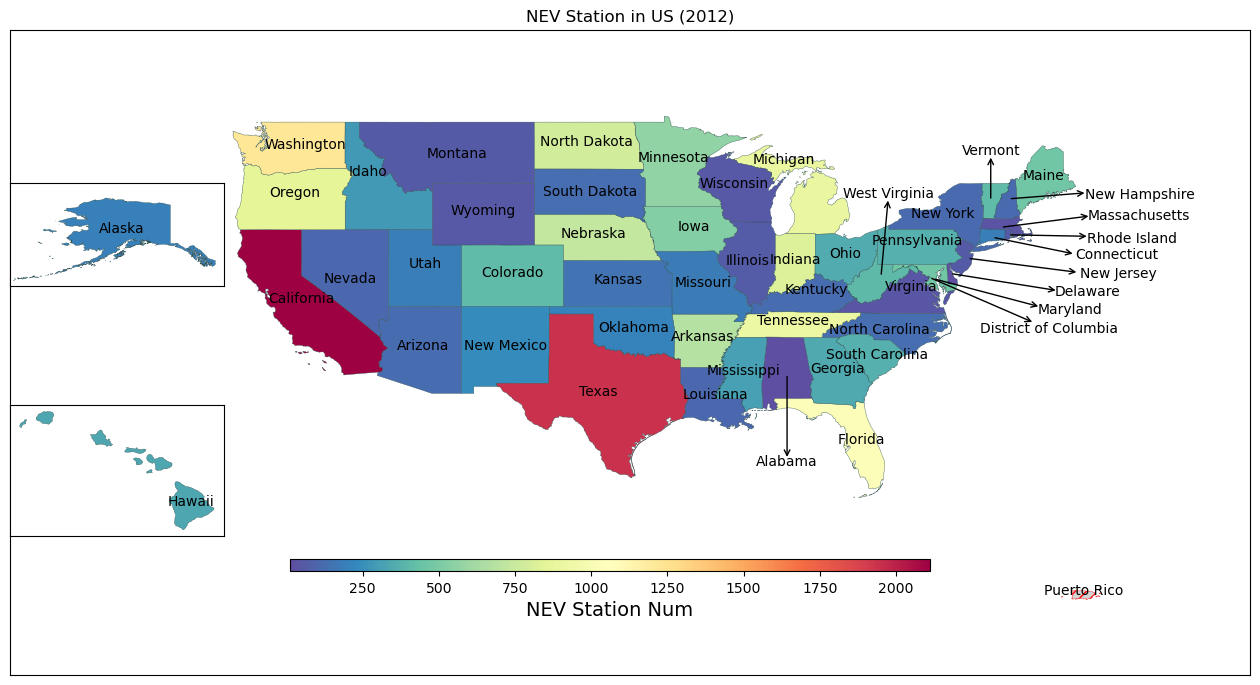

In [321]:
def draw_US_map_with_label(max_,min_,US_Station,title,bar_title,c_ax,col_name):
    fig = plt.figure(figsize=[16,12],dpi=100)
    ax = fig.add_subplot(111)
    
    # Convert into GeoDF fromat
    US_Station = GeoDataFrame(US_Station)
    
    # Split into 3 part to display the map
    df_Alaska = US_Station[US_Station.index == 'Alaska']
    df_Hawaii = US_Station[US_Station.index == 'Hawaii']
    df_Main = US_Station.drop(index=('Alaska'))
    df_Main = df_Main.drop(index=('Hawaii'))
    
    # Setup the colour map and normalise it.
    norm = matplotlib.colors.Normalize(vmin=min_, vmax=max_)
    cmap = matplotlib.cm.get_cmap('Spectral_r')

    # Draw US main map
    df_Main.plot(column=col_name, cmap=cmap, norm=norm, ax=ax, lw=.25, edgecolor='darkslategrey',\
                 missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"})

    # Draw state names
    for idx, row in df_Main.iterrows():
       plt.annotate(text=row['State'], xy=row['coords'], horizontalalignment='center', color='black')
    # Draw arrow for overlapped name
    for idx, row in df_overlap_pos.iterrows():
        ax.annotate("", xy=row['arrow'], xytext=row['old'],arrowprops=dict(arrowstyle="->"))
    
    # Tighten up the view
    plt.xlim([-140, -55])
    plt.ylim([13, 55])

    # Remove unnecessary tick marks.
    remove_tick_mark(ax)

    # Set title label.
    ax.set_title(title)

    # Add the colour bar and label it.
    cax = fig.add_axes(c_ax)
    cb = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional', orientation='horizontal')
    cb.set_label(bar_title, fontsize=14)

    # Draw Alaska Map
    ax = fig.add_subplot(4,5,6)
    df_Alaska.plot(column=col_name, cmap=cmap, norm=norm, ax=ax, lw=.25, edgecolor='darkslategrey',\
                   missing_kwds={"color": "lightgrey","edgecolor": "red",\
                                 "hatch": "///","label": "Missing values"}\
                  )
    # Tighten up the view
    plt.xlim([-180, -128])
    plt.ylim([50,75])
    # Show Alaska name
    plt.annotate(text='Alaska', xy=df_Alaska['coords']['Alaska'], horizontalalignment='center', color='black')
    # Remove unnecessary tick marks.
    remove_tick_mark(ax)
    
    # Draw Hawaii Map
    ax = fig.add_subplot(4,5,11)
    df_Hawaii.plot(column=col_name, cmap=cmap, norm=norm, ax=ax, lw=.25, edgecolor='darkslategrey',\
                   missing_kwds={"color": "lightgrey","edgecolor": "red",\
                                 "hatch": "///","label": "Missing values"}\
                  )
    # Show Hawaii name
    plt.annotate(text='Hawaii', xy=df_Hawaii['coords']['Hawaii'], horizontalalignment='center', color='black');
    # Remove unnecessary tick marks.
    remove_tick_mark(ax)
    
    return fig

# Remove unnecessary tick marks.
def remove_tick_mark(ax):
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
        

fig = draw_US_map_with_label(max_ = US_Station['Total'].sort_values(ascending=False).head(4).mean(),
                             min_ = US_Station['Total'].min(),
                             US_Station = US_Station,
                             title = 'NEV Station in US (2012)',
                             bar_title = 'NEV Station Num',
                             # Set colour bar position.
                             c_ax = [.3, .32, .4, .01],
                             col_name = 'Total')

# Save as png image
fig.savefig('./Outputs/NEV_Station_in_US.png', format='png')

## Draw Gas Station Map

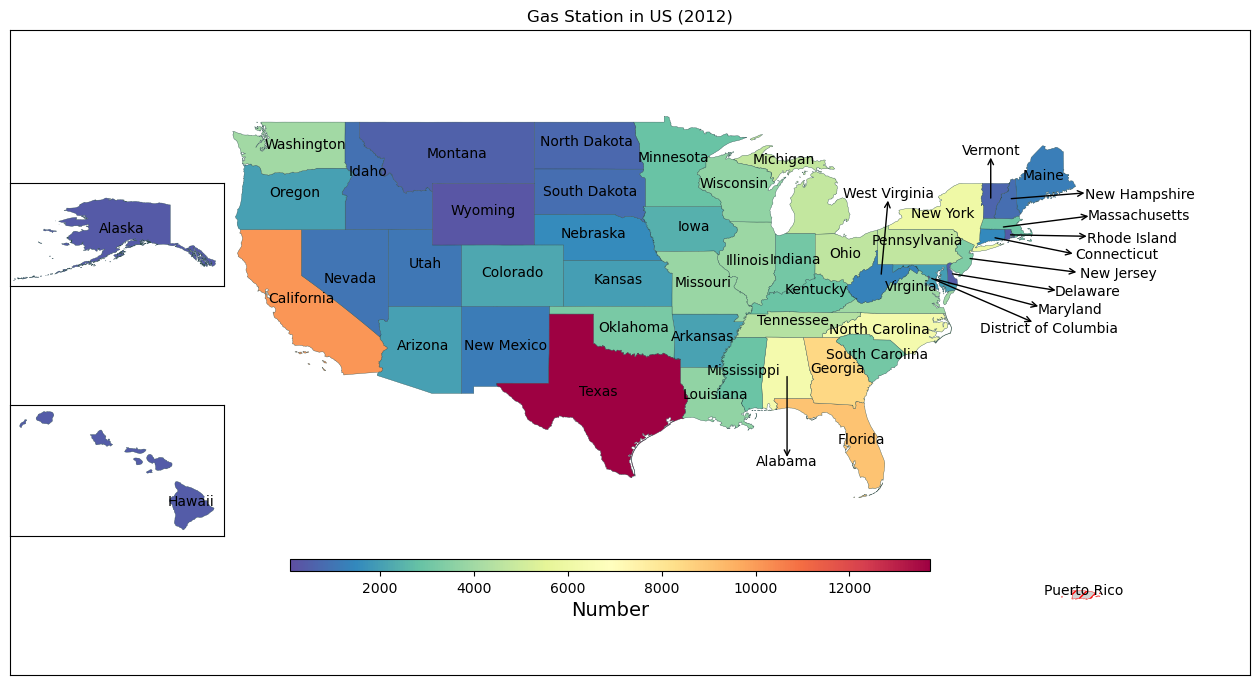

In [322]:
US_Gas_Station = pd.concat([df_Gas['2012'], US_gpd], axis = 1)
US_Gas_Station['State'] = US_Gas_Station.index

# Setting for adjust color range
fig = draw_US_map_with_label(max_ = US_Gas_Station['2012'].max(),
                             min_ = US_Gas_Station['2012'].min(),
                             US_Station = US_Gas_Station,
                             title = 'Gas Station in US (2012)',
                             bar_title = 'Number',
                             # Set colour bar position.
                             c_ax = [.3, .32, .4, .01],
                             col_name = '2012')
# Save as png image
fig.savefig('./Outputs/Gas_Station_in_US.png', format='png')

## Draw All Type Station Map

In [325]:
US_All_Station = pd.concat([(df_NEV[df_NEV['Year']==2012]['Total'] + df_Gas['2012']).rename('Sum'),
                            US_gpd], axis = 1)
US_All_Station['State'] = US_All_Station.index
US_All_Station.head()

,Sum,geometry,coords,State
Alabama,6312.0,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...","(-86.73307855039542, 26.613208)",Alabama
Alaska,559.0,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...","(-152.91343141521298, 62.878043500000004)",Alaska
Arizona,2149.0,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...","(-111.66851071789918, 34.1684675)",Arizona
Arkansas,2789.0,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...","(-92.49853688179809, 34.7509515)",Arkansas
California,14361.0,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...","(-119.9915015382688, 37.27239)",California


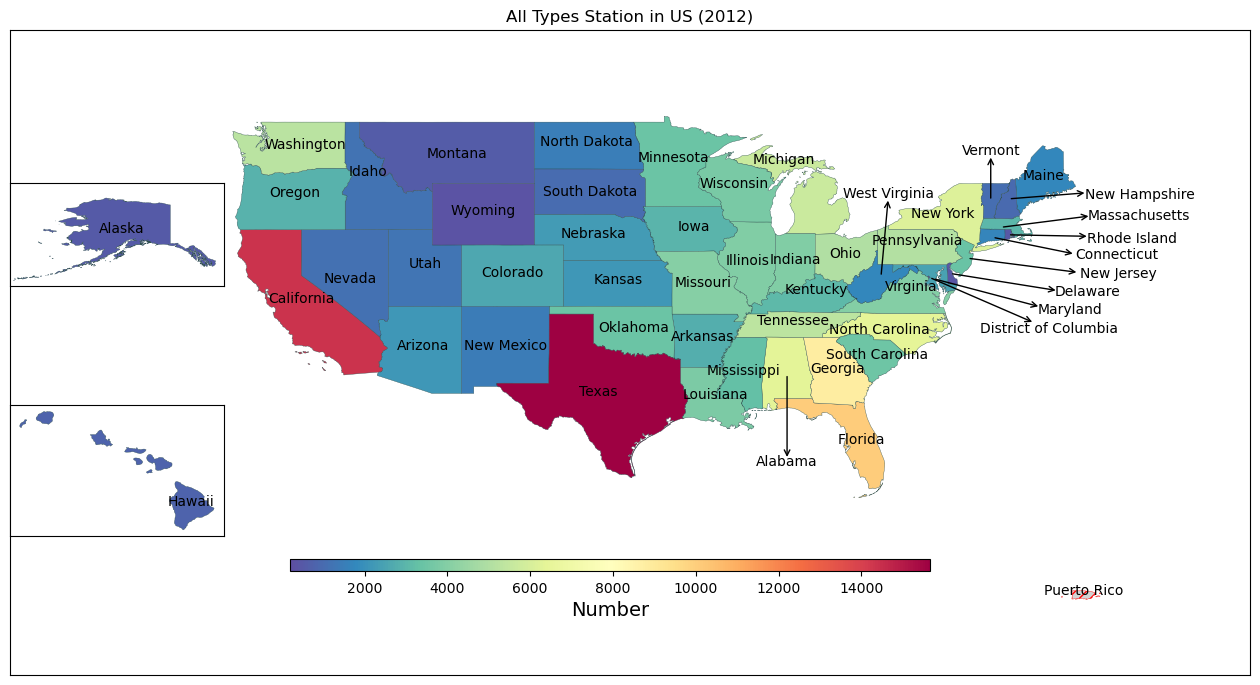

In [326]:
US_All_Station = pd.concat([(df_NEV[df_NEV['Year']==2012]['Total'] + df_Gas['2012']).rename('Sum'),
                            US_gpd], axis = 1)
US_All_Station['State'] = US_All_Station.index

# Setting for adjust color range
fig = draw_US_map_with_label(max_ = US_All_Station['Sum'].max(),
                             min_ = US_All_Station['Sum'].min(),
                             US_Station = US_All_Station,
                             title = 'All Types Station in US (2012)',
                             bar_title = 'Number',
                             # Set colour bar position.
                             c_ax = [.3, .32, .4, .01],
                             col_name = 'Sum')
# Save as png image
fig.savefig('./Outputs/All_Types_Station_in_US.png', format='png')